# Analysis of Performance of Planning Algorithms Tested Using the Evaluation Framework

This notebook contains plots which display the performance of different algorithms using the defined evaluation methodology.

Data recorded for each algorithm includes:
    

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("dark")

In [2]:
with open("evaluation_results.json") as json_data:
    data = json.load(json_data)
    json_data.close()

### Method to Plot Bar Charts Of Specific Attributes

In [3]:
def plot_barcharts_attribute(key):
    for algo in data:
        attribute = algo[key]
        attribute = [0 if v is None else v for v in attribute]
        index = range(len(attribute))

        plt.figure(figsize=(10, 5))
        plt.title(f"{key}: {algo['Algorithm']}")
        plt.bar(index, attribute)
        plt.show()

def plot_comparison_barchart(algo1, algo2, key):
    algo_found = 0
    bar_width = 0.35
    plt.figure(figsize=(10, 5))

    map_names = data[0]["Map Names"]
    index = range(len(map_names))

    for algo in data:
        if algo["Algorithm"] in [algo1, algo2]:
            algo_found += 1
            key_data = algo[key]
            key_data = [0 if v is None else v for v in key_data]

            if algo_found == 1:
                plt.bar(index, key_data, bar_width, label=algo["Algorithm"])
            else:
                plt.bar([i + bar_width for i in index], key_data, bar_width, label=algo["Algorithm"])
        else:
            next

    plt.xticks([i + bar_width / 2 for i in index], map_names, rotation=30, ha="center")
    plt.xlabel("Map Number")
    plt.ylabel(key)
    plt.title(f"Comparison of {key} between {algo1} and {algo2}")
    plt.legend()
    plt.show()

### Plot of Time Taken to Calculate Path

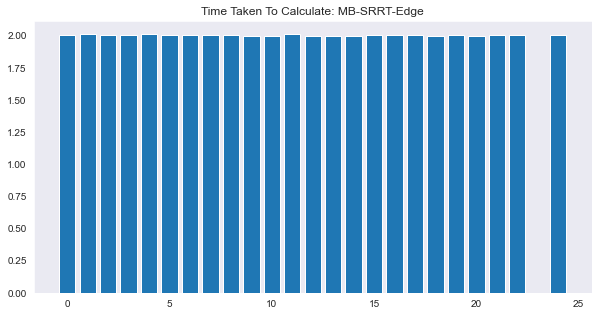

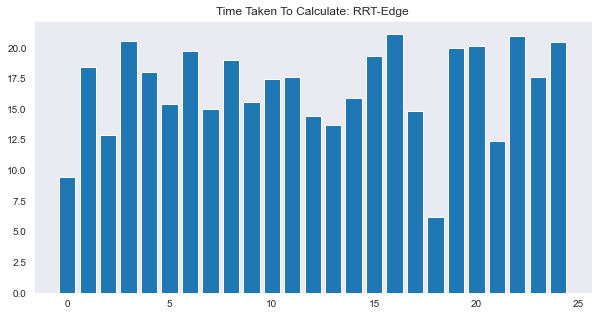

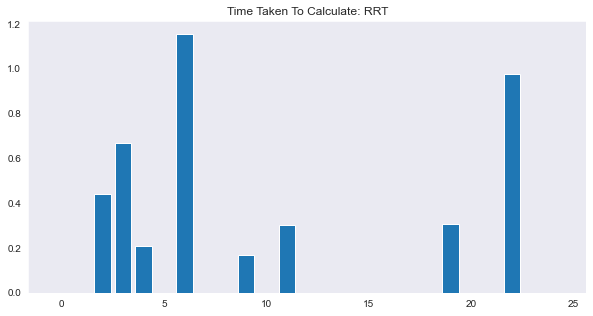

In [4]:
plot_barcharts_attribute("Time Taken To Calculate")

### Plot of Path Length

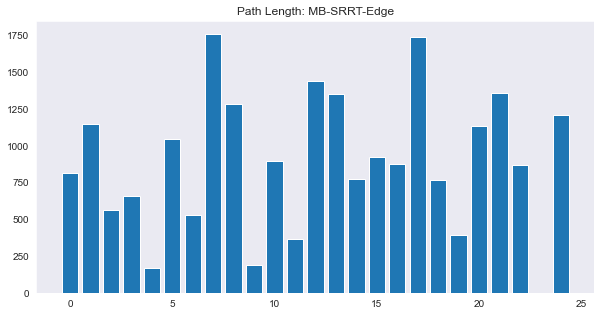

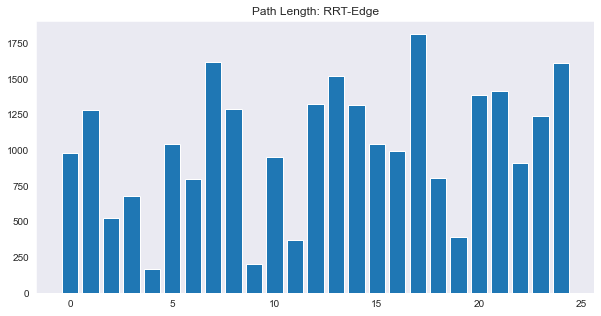

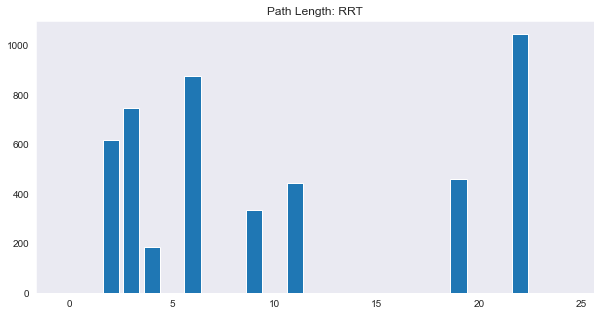

In [5]:
plot_barcharts_attribute("Path Length")

### Plot of Energy Consumption of Each Algorithm 

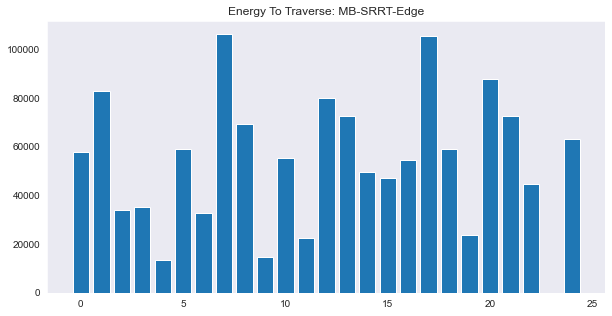

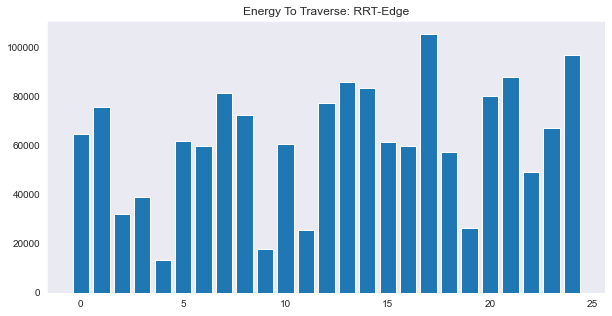

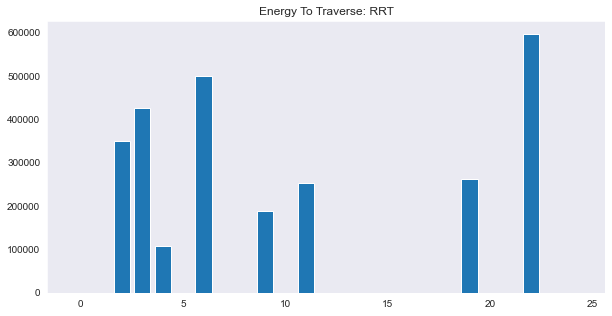

In [6]:
plot_barcharts_attribute("Energy To Traverse")

## Comparison of MB-SRRT-Edge to RRT-Edge

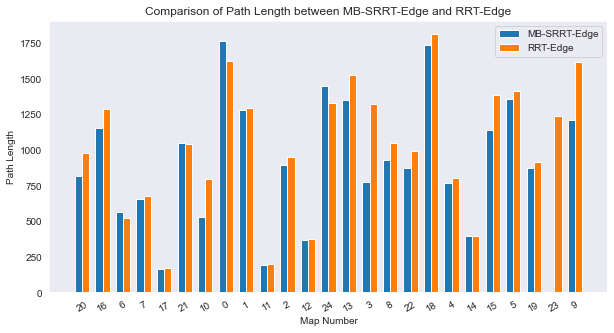

In [7]:
plot_comparison_barchart("MB-SRRT-Edge", "RRT-Edge", "Path Length")

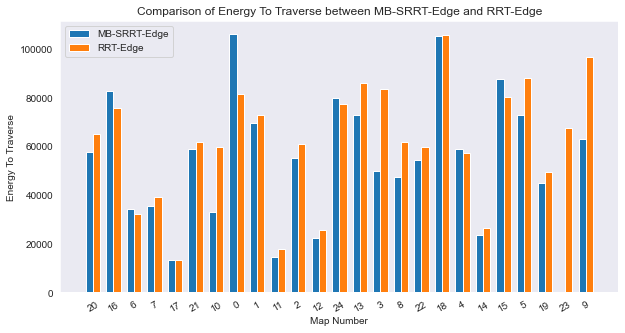

In [10]:
plot_comparison_barchart("MB-SRRT-Edge", "RRT-Edge", "Energy To Traverse")

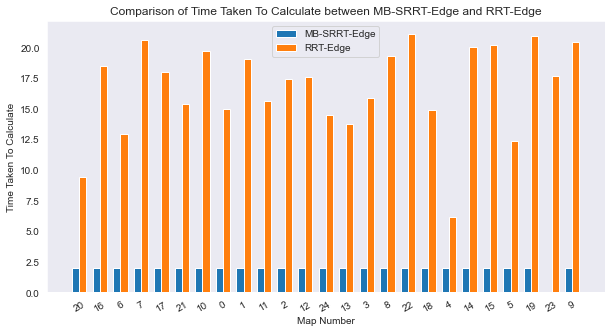

In [9]:
plot_comparison_barchart("MB-SRRT-Edge", "RRT-Edge", "Time Taken To Calculate")

As can be seen, whilst MB-SRRT-Edge and the anytime adaptation of RRT-Edge yeild similar results with respect to path length and energy consumption, RRT-Edge 